# Case Study: Gastrulation Erythroid

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import glob
import random
import sys
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
#srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
#srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
# srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer.velocity_estimation import velocity
from celldancer.compute_cell_velocity import compute
from celldancer.pseudo_time import pseudo_time
from celldancer.embedding_kinetic_para import embedding

## Velocity Estimation for Sample Genes

In [2]:
%autoreload 2

# raw_path='/Users/chen.weiqing/code/celldancer/mouse_endo_blood20to25_2000_genes_moment100.csv'
cell_type_u_s_path='/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/raw_data/GastrulationErythroid.csv'
cell_type_u_s=pd.read_csv(cell_type_u_s_path)
cell_type_u_s

,gene_name,unsplice,splice,cellID,clusters,embedding1,embedding2
0,Sox17,0.000000,0.043971,cell_363,Blood progenitors 2,3.460521,15.574629
1,Sox17,0.000000,0.000000,cell_382,Blood progenitors 2,2.490433,14.971734
2,Sox17,0.000000,0.018161,cell_385,Blood progenitors 2,2.351203,15.267069
3,Sox17,0.000000,0.000000,cell_393,Blood progenitors 2,5.899098,14.388825
4,Sox17,0.000000,0.000000,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...
24657995,Gm47283,0.214961,1.145533,cell_139318,Erythroid3,8.032358,7.603037
24657996,Gm47283,0.300111,1.072944,cell_139321,Erythroid3,10.352904,6.446736
24657997,Gm47283,0.292607,1.199875,cell_139326,Erythroid3,9.464873,7.261099
24657998,Gm47283,0.266031,1.114659,cell_139327,Erythroid3,9.990495,7.243880


In [3]:
%autoreload 2

max_epoches=200
check_val_every_n_epoch=10
patience=3
permutation_ratio=0.125
n_neighbors=30
speed_up=True
norm_u_s=True
norm_cell_distribution=True
n_jobs=8
save_path=None

gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Grb10','Rbms2'][0:3]

# Velocity Estimation
loss_df, cellDancer_df=velocity(cell_type_u_s,\
                             gene_list=gene_list,\
                             max_epoches=max_epoches,\
                             check_val_every_n_epoch=check_val_every_n_epoch,\
                             patience=patience,\
                             permutation_ratio=permutation_ratio,\
                             speed_up=speed_up,\
                             norm_u_s=norm_u_s,\
                             norm_cell_distribution=norm_cell_distribution,\
                             n_jobs=n_jobs,\
                             save_path=save_path)
cellDancer_df

Using /Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/analysis/CaseStudyNotebook/cell_dancer_velocity_2022-05-27 16-37-20 as the output path.
Arranging genes for parallel job.
3  genes were arranged to  1  portion.


Velocity Estimation: 100%|████████████████████████| 1/1 [00:10<00:00, 10.60s/it]


,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Hba-x,0.000000,0.123217,0.079692,0.123116,0.055302,2.136231,1.708222,0.287265,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Hba-x,0.000000,0.009722,0.079692,0.009714,0.055302,2.136226,1.708220,0.287265,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Hba-x,0.000000,0.008806,0.079692,0.008798,0.055302,2.136226,1.708220,0.287265,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Hba-x,0.000000,4.617777,0.079672,4.613992,0.055288,2.136408,1.708336,0.287265,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Hba-x,0.000000,0.987102,0.079688,0.986293,0.055299,2.136265,1.708242,0.287265,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36982,12324,Blvrb,0.187607,14.038795,0.167725,16.028320,0.152124,0.296101,0.310560,0.134739,cell_139318,Erythroid3,8.032358,7.603037
36983,12325,Blvrb,0.242914,15.395999,0.199662,18.072239,0.133793,0.304560,0.314724,0.134739,cell_139321,Erythroid3,10.352904,6.446736
36984,12326,Blvrb,0.237657,14.569963,0.198581,17.170382,0.141654,0.302026,0.313036,0.134739,cell_139326,Erythroid3,9.464873,7.261099
36985,12327,Blvrb,0.320802,14.902560,0.250122,18.552816,0.128749,0.310249,0.316472,0.134739,cell_139327,Erythroid3,9.990495,7.243880


## Sample Genes' Velocity Plot

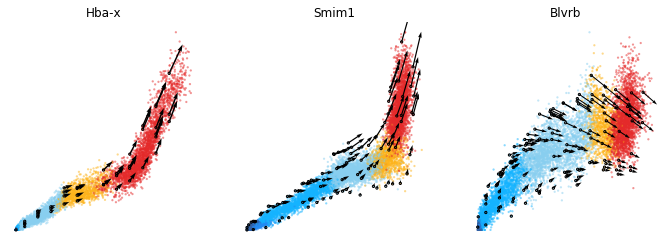

In [4]:
%autoreload 2

gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Yipf5','Rbms2'][0:3]

ncols=5
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='splice',
        y='unsplice',
        cellDancer_df=cellDancer_df,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

In [29]:
cellDancer_df

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880


## Load velocity estimation result of 2000 genes

In [20]:
#detail_file = '/Users/chen.weiqing/code/celldancer/combined_detail.csv'
cellDancer_df_path = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/data/Gastrulation/velocity_result/result_detailcsv/2000genes_with_bin_and_smooth/combined_detail/combined_detail copy.csv'
cellDancer_df=pd.read_csv(cellDancer_df_path)
cellDancer_df

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880


## Compute Cell Velocity and Estimate Pseudotime

(genes, cells): (2000, 12329)


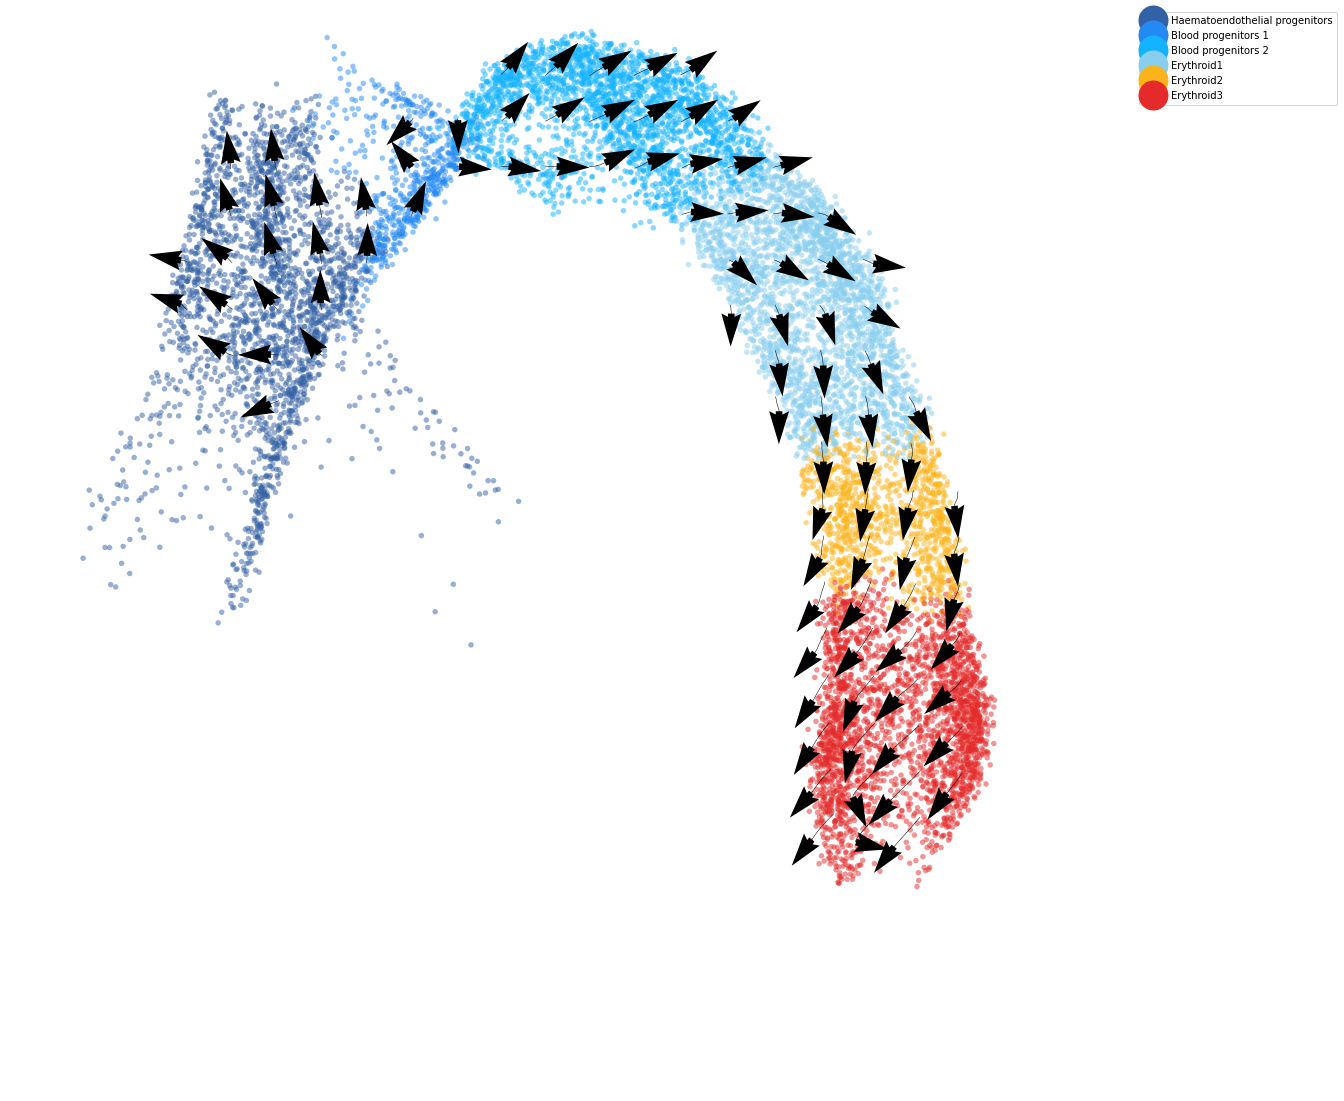

In [38]:
%autoreload 2

# Set parameters
projection_neighbor_choice='gene'
expression_scale='power10'
projection_neighbor_size=10
speed_up=(100,100)

min_mass=15
arrow_grid=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
s=30
alpha=0.5
display_velocity=True

# compute cell velocity
cellDancer_df=compute(cellDancer_df=cellDancer_df,
              projection_neighbor_choice=projection_neighbor_choice,
              expression_scale=expression_scale,
              projection_neighbor_size=projection_neighbor_size,
              speed_up=speed_up)

# plot cell velocity
fig, ax = plt.subplots(figsize=(20,20))
cdplt.cell.scatter_cell(ax,
                        cellDancer_df, 
                        colors=cdplt.colormap.colormap_erythroid, 
                        alpha=alpha, 
                        s=s,
                        velocity=display_velocity,
                        legend='on',
                        min_mass=min_mass,
                        arrow_grid=arrow_grid,
                        custom_xlim=custom_xlim, 
                        custom_ylim=custom_ylim, )
ax.axis('off')
plt.show()

In [40]:
cellDancer_df

,cellIndex,gene_name,splice,unsplice,splice_predict,unsplice_predict,alpha,beta,gamma,cost,clusters,cellID,embedding1,embedding2,index,velocity1,velocity2
0,0,2810025M15Rik,1.515440,0.000000,1.514860,0.000022,0.001560,0.022612,0.005908,0.087183,Blood progenitors 2,cell_363,3.460521,15.574629,0,NaN,NaN
1,1,2810025M15Rik,1.574459,0.000000,1.573860,0.000022,0.001522,0.022650,0.005876,0.087183,Blood progenitors 2,cell_382,2.490433,14.971734,1,NaN,NaN
2,2,2810025M15Rik,1.744201,0.000000,1.743548,0.000020,0.001426,0.022751,0.005787,0.087183,Blood progenitors 2,cell_385,2.351203,15.267069,2,NaN,NaN
3,3,2810025M15Rik,1.332406,0.000000,1.331888,0.000024,0.001682,0.022495,0.006009,0.087183,Blood progenitors 2,cell_393,5.899098,14.388825,3,NaN,NaN
4,4,2810025M15Rik,1.261786,0.000000,1.261292,0.000025,0.001732,0.022449,0.006049,0.087183,Blood progenitors 2,cell_398,4.823139,15.374831,4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24657995,12324,Zrsr2,0.255452,0.030816,0.323642,0.022484,0.005919,0.101278,0.144163,0.126370,Erythroid3,cell_139318,8.032358,7.603037,12324,NaN,NaN
24657996,12325,Zrsr2,0.204272,0.049630,0.322781,0.036203,0.008434,0.100651,0.142879,0.126370,Erythroid3,cell_139321,10.352904,6.446736,12325,NaN,NaN
24657997,12326,Zrsr2,0.230350,0.050146,0.349145,0.036532,0.008174,0.100769,0.143180,0.126370,Erythroid3,cell_139326,9.464873,7.261099,12326,NaN,NaN
24657998,12327,Zrsr2,0.236227,0.052799,0.361591,0.038445,0.008380,0.100769,0.143180,0.126370,Erythroid3,cell_139327,9.990495,7.243880,12327,NaN,NaN


## Estimate Pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|███████████████████████████████████████| 9510/9510 [06:15<00:00, 25.34it/s]


use path_similarity:  0.25
There are 3 clusters.
[0 1 2]


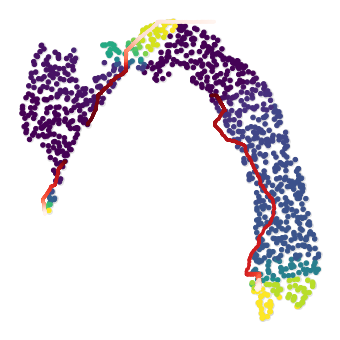




Cluster  0
Total cells in the cluster:  630
MAX allowed zero time cells:  31
MAX allowed terminal cells:  31
Only  2  zero cells left. 
[179, 742]
Only  1  terminal cells left.
[328]
number of paths:  1 1

Display reference paths for cluster 0


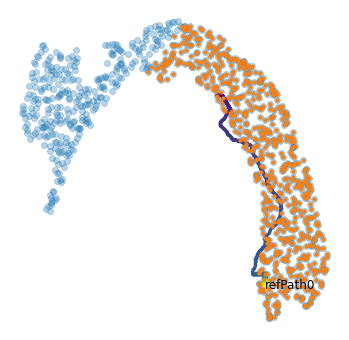




Cluster  1
Total cells in the cluster:  303
MAX allowed zero time cells:  15
MAX allowed terminal cells:  15
Only  1  terminal cells left.
[405]
70  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  1
Total cells in the cluster:  70
MAX allowed zero time cells:  15
MAX allowed terminal cells:  15
Only  4  terminal cells left.
[67, 79, 145, 790]
26  zero cells left.
Sample trajs for zero-time cells in cluster  1   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
%autoreload 2

cell_time = dict()
dt = 0.01
#t_total = {dt:int(10/dt)} 
t_total = {0.01: 10000}
n_repeats = 10

grid = (20,20)
speed_up=(100,100)
cellDancer_df = pseudo_time(
    cellDancer_df=cellDancer_df, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    speed_up=speed_up,
    n_paths = 3,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

## Plot Pseudotime

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = cellDancer_df['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,cellDancer_df, colors='pseudotime', alpha=0.5, 
             velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

## Gene Pseudotime

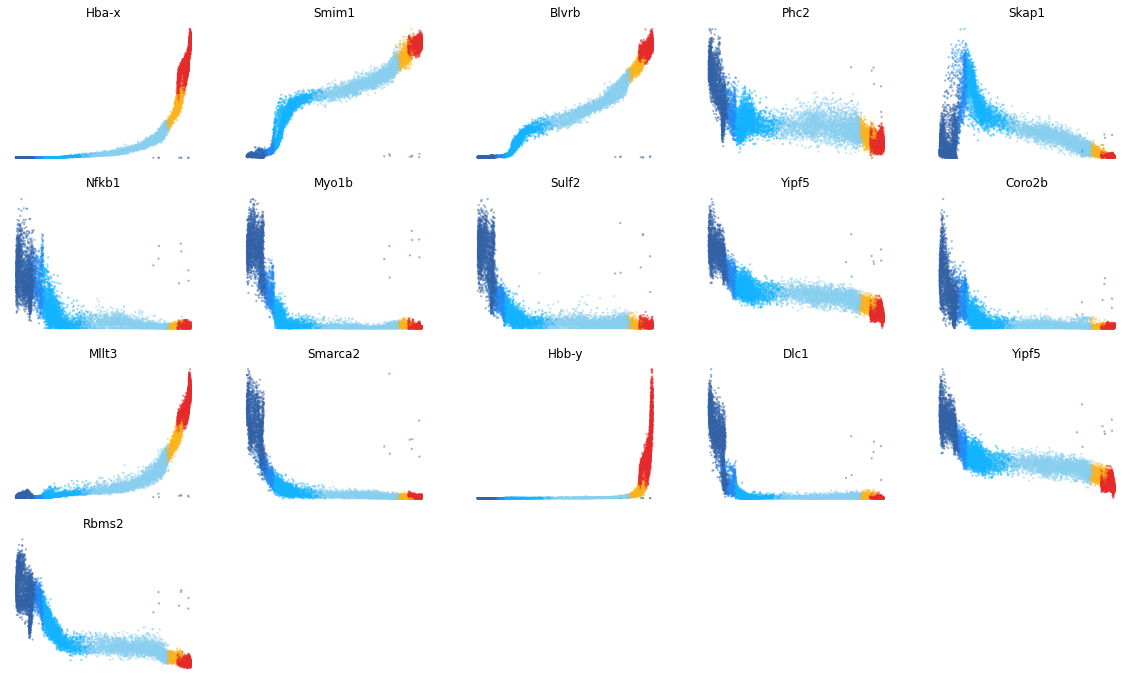

In [9]:
ncols=5
fig = plt.figure(figsize=(20,12))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='splice',
        cellDancer_df=cellDancer_df,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Murk Genes Cell Velocity

In [12]:
murk_gene_pd=pd.read_csv('/Users/chen.weiqing/code/celldancer/13059_2021_2414_MOESM3_ESM.csv')
murk_gene_list=list(murk_gene_pd['index'])

# Set Parameters
n_neighbors=10
downsample_step=(100,100)
mode='gene'
transfer_mode='power10'
min_mass=15
grid_steps=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
alpha_inside=0.3

# Compute Cell Velocity
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=murk_gene_list,
              mode=mode,
              transfer_mode=transfer_mode,
              n_neighbors=n_neighbors,
              step=downsample_step)

fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_erythroid, alpha=alpha_inside, s=10,
             velocity=True, custom_xlim=custom_xlim, custom_ylim=custom_ylim, legend='on',min_mass=min_mass,grid_steps=grid_steps)
ax.axis('off')
plt.show()